In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = "marketing_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

(None,
       ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
 0   1826        1970  Graduation       Divorced  $84,835.00         0   
 1      1        1961  Graduation         Single  $57,091.00         0   
 2  10476        1958  Graduation        Married  $67,267.00         0   
 3   1386        1967  Graduation       Together  $32,474.00         1   
 4   5371        1989  Graduation         Single  $21,474.00         1   
 
    Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
 0         0     6/16/14        0       189  ...                  6   
 1         0     6/15/14        0       464  ...                  7   
 2         1     5/13/14        0       134  ...                  5   
 3         1     5/11/14        0        10  ...                  2   
 4         0      4/8/14        0         6  ...                  2   
 
    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
 0                  1             0   

In [4]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

# Now try accessing 'Income'
df['Income'] = df['Income'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [5]:
# Convert 'Income' column to numeric by removing '$' and ','
df[' Income'] = df[' Income'].str.replace(r'[\$,]', '', regex=True).astype(float)

# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# Fill missing income values by grouping with Education & Marital_Status
df[' Income'] = df.groupby(['Education', 'Marital_Status'])[' Income'].transform(lambda x: x.fillna(x.mean()))

# Create new feature: Total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Create new feature: Age of customers (assuming current year is 2025)
df['Age'] = 2025 - df['Year_Birth']

# Create new feature: Total Spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)

# Display updated dataset summary
df[[' Income', 'Dt_Customer', 'Total_Children', 'Age', 'Total_Spending']].head()

KeyError: ' Income'

In [6]:
# Display the current column names to check if 'Age' and 'Total_Spending' exist
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
# Recreate missing features
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2025 - df['Year_Birth']

# Ensure spending columns exist before summing
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)

# Verify the changes
df[['Total_Children', 'Age', 'Total_Spending']].head()

,Total_Children,Age,Total_Spending
0,0,55,1190
1,0,64,577
2,1,67,251
3,2,58,11
4,1,36,91


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

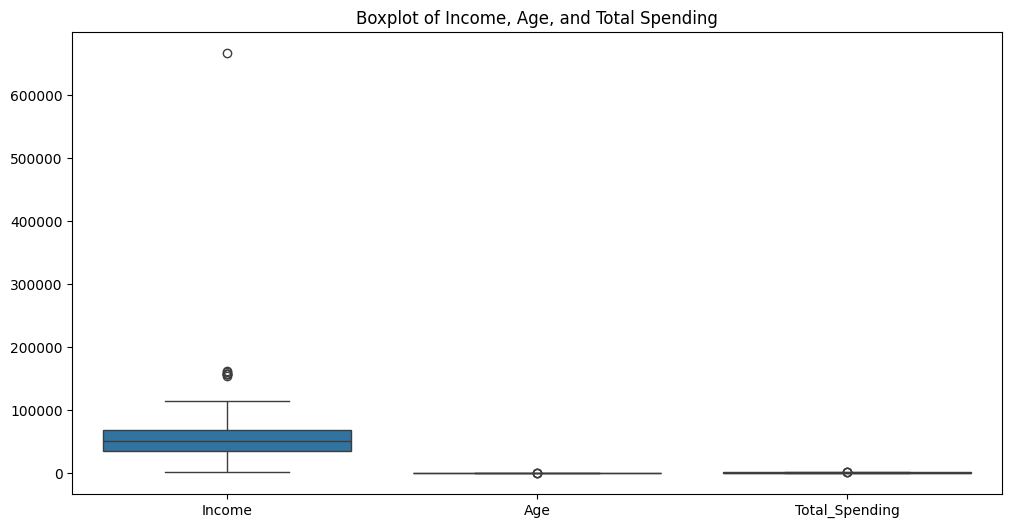

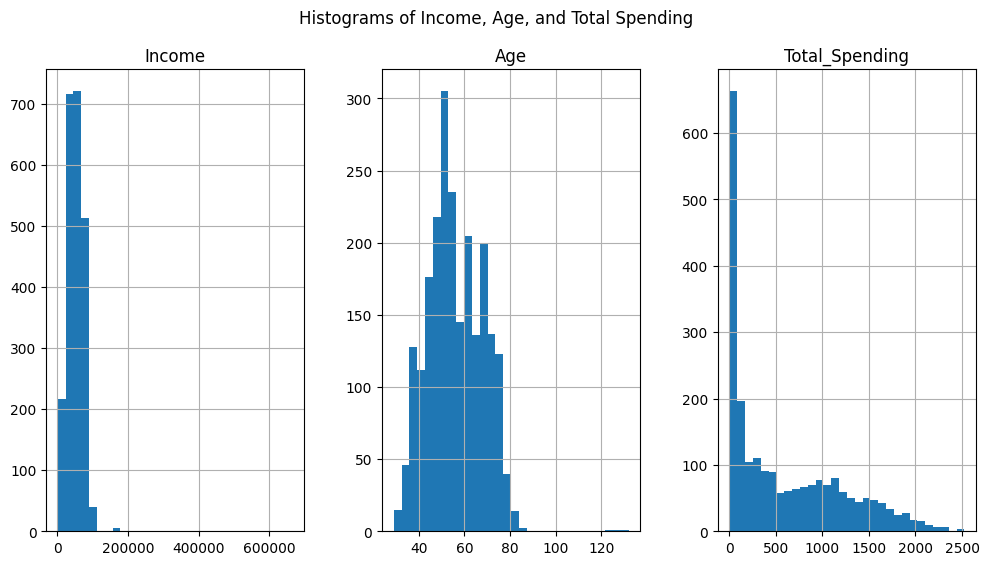

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Income', 'Age', 'Total_Spending']])
plt.title("Boxplot of Income, Age, and Total Spending")
plt.show()

df[['Income', 'Age', 'Total_Spending']].hist(bins=30, figsize=(12, 6), layout=(1, 3))
plt.suptitle("Histograms of Income, Age, and Total Spending")
plt.show()

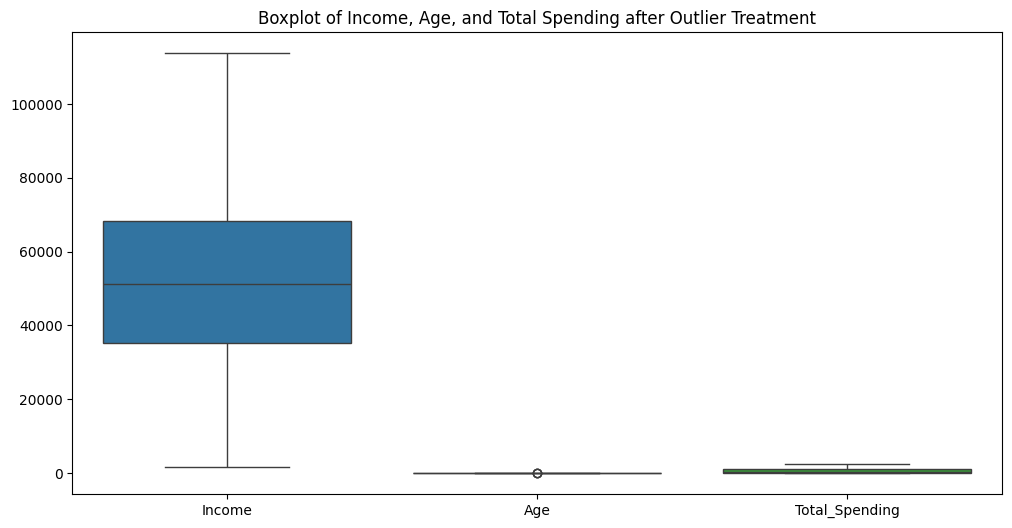

In [10]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier treatment to 'Income' and 'Total_Spending'
df = remove_outliers(df, 'Income')
df = remove_outliers(df, 'Total_Spending')

# Verify the changes with updated boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Income', 'Age', 'Total_Spending']])
plt.title("Boxplot of Income, Age, and Total Spending after Outlier Treatment")
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Identify categorical columns
categorical_cols = ['Education', 'Marital_Status', 'Country']

# Apply One-Hot Encoding for 'Country' since it has no clear order
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Apply Ordinal Encoding for 'Education' (assuming a ranking order)
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])

# Apply One-Hot Encoding for 'Marital_Status' since it's categorical without clear ranking
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

# Verify the transformed dataset
df.head()


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Country_SA,Country_SP,Country_US,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,2.0,84835.0,0,0,6/16/14,0,189,104,...,False,True,False,False,True,False,False,False,False,False
1,1,1961,2.0,57091.0,0,0,6/15/14,0,464,5,...,False,False,False,False,False,False,True,False,False,False
2,10476,1958,2.0,67267.0,0,1,5/13/14,0,134,11,...,False,False,True,False,False,True,False,False,False,False
3,1386,1967,2.0,32474.0,1,1,5/11/14,0,10,0,...,False,False,False,False,False,False,False,True,False,False
4,5371,1989,2.0,21474.0,1,0,4/8/14,0,6,16,...,False,True,False,False,False,False,True,False,False,False
